# Database (SQL) Mini-Analysis of World Bank Data - Practice

## Overview

Much has been written about the potential impact the use of cell phones while driving have on traffic injuries and fatalities worldwide (see references below). This mini-analysis performs an initial exploratory investigation of the relationship between international cell phone subscriptions and mortality from traffic injuries for the years 2000 and 2019. The data were obtained from the World Bank free online dataset repository.

## Learning Goals

The learning goal of this practice is to become proficient with applying data carpentry and shaping and basic exploratory data analysis to the creation and manipulation of an SQL database.

## Learning Objectives

* Read .csv files into Pandas data frames
* Construct and execute SQL "CREAT TABLE", "Insert Into", and "SELECT" statements consistent with specified data requirements
* Apply data carpentry to (create/drop/revise) Pandas rows and columns
* Reshape Pandas data frame structures from "wide to long" and "long to wide" using .melt() and .pivot() methods
* Compute bivariate correlations and plot data values useful for exploratory data analysis

## Resources

To begin, read and become familiar with the details of the [World Bank Data Dictionary](../resources/WorldBankDataDictionary.pdf) describing the necessary requirements for constructing the database and necessary table schema and table relationships.
Also refer to initial module technical readings as necessary.


#### References
- [World Bank Data Repository](https://data.worldbank.org/)

- [Association between Cellular-Telephone Calls and Motor Vehicle Collisions](../resources/AssociationbetweenCellular-TelephoneCallsandMotorVehicleCollisions.pdf)

- [Mobile Device Use While Driving — United States and Seven European Countries, 2011.pdf](../resources/MobileDeviceUseWhileDrivingUnitedStatesandSevenEuropeanCountries2011.pdf)

- [WHO-RoadSafetyReport2018.pdf](../resources/WHO-RoadSafetyReport2018.pdf)

### Instructions


After making any required code changes and completing the tasks and activities, run each cell individually in sequence to execute the code and obtain output.

In [1]:
#Inport all the necessary libraries/packages
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error
pd.set_option("max_colwidth", 100) #<--make pandas columns wider


# What is SQLite3?
From the Documentation:

"SQLite is an in-process library that implements a self-contained, serverless, zero-configuration, transactional SQL database engine. The code for SQLite is in the public domain and is thus free for use for any purpose, commercial or private. SQLite is the most widely deployed database in the world with more applications than we can count, including several high-profile projects.

"SQLite is an embedded SQL database engine. Unlike most other SQL databases, SQLite does not have a separate server process. SQLite reads and writes directly to ordinary disk files. A complete SQL database with multiple tables, indices, triggers, and views, is contained in a single disk file. The database file format is cross-platform - you can freely copy a database between 32-bit and 64-bit systems or between big-endian and little-endian architectures. These features make SQLite a popular choice as an Application File Format. Think of SQLite not as a replacement for Oracle but as a replacement for fopen().

### SQLite Interfaces:
SQLite has numerous interfaces, including a command line interface (CLI). Additionally, API interfaces are provided in numerous environments / langauges such as C / C++ / Python/ R / PHP / Perl /......

Run the below cell to activate the function.  This utility function will be used in other cells to retrieve and display the constructed database structure and schema.

In [2]:
def display_db_table_structure(conn):
    '''
    This function will output as text the names of each table in the active database connection
    and each column deail in each table.
        
    Arguments:
       conn: the active/open database connection.
    
    Returns : nothing
    '''
    try:
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("WBIndicatorDB - Tables")
        print(tables)
        print("WBIndicatorDB - Table Schema")
        for t in tables:
            print(t[0])
            print(cursor.execute("PRAGMA table_info('" + t[0] +"')").fetchall())
            
    except Error as e:
        print("display_db_table_structure -- Exception: ", e)

Now we can use the Pandas "read_csv" method to read in each of the three World Bank comma separated value (csv) files and assign to a data frame.

In [3]:
geocodes_df = pd.read_csv('/dsa/data/all_datasets/world_bank_datasets/WBGeoCodes.csv') #path = /dsa/data/all_datasets/world_bank_datasets/...
CellPhones_df = pd.read_csv('/dsa/data/all_datasets/world_bank_datasets/WBCellPhoneUse.csv')
TrafficMort_df = pd.read_csv('/dsa/data/all_datasets/world_bank_datasets/WBTrafficFatalities.csv')

Display the head of each data frame.

In [4]:
display(geocodes_df.head())
display(CellPhones_df.head())
display(TrafficMort_df.head())

,CountryRegion3Code,CountryRegionName,IsCountry
0,ABW,Aruba,1
1,AFE,Africa Eastern and Southern,0
2,AFG,Afghanistan,1
3,AFW,Africa Western and Central,0
4,AGO,Angola,1


,CountryRegion3Code,IndicatorName,IndicatorCode,Y2000,Y2019
0,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,16.510187,NaN
1,AFE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2.515358,78.463447
2,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,59.356020
3,AFW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.535656,97.841583
4,AGO,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.157397,46.598638


,CountryRegion3Code,IndicatorName,IndicatorCode,Y2000,Y2019
0,ABW,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,NaN,NaN
1,AFE,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,31.099905,29.380510
2,AFG,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,14.700000,15.900000
3,AFW,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,28.195550,24.568777
4,AGO,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,25.100000,26.100000



**Activity 1:** Using the database dictionary, fill-in the necessary details for constructing an SQL **CREATE TABLE** statement string for creating the WBGeoCodes table. Be sure to specify each column name and data type and set the primary key.  Starter code is provided.

In [5]:
# Your code for Activity 1
# --------------

#geocodes_CreateTableStmt = "CREATE TABLE ??? ( "
#geocodes_CreateTableStmt += "???"
#geocodes_CreateTableStmt += ")"

geocodes_CreateTableStmt = "CREATE TABLE WBGeoCodes ( "
geocodes_CreateTableStmt += "CountryRegion3Code TEXT, "
geocodes_CreateTableStmt += "CountryRegionName TEXT, "
geocodes_CreateTableStmt += "IsCountry INTEGER, "
geocodes_CreateTableStmt += "PRIMARY KEY(CountryRegion3Code))"


After constructing the SQL CREATE TABLE statement for the geocode data, we can now create the table in which those data will be stored. All database operations will be encapsulated in a try/except block in order to manage and debug any potential exception conditions that might occur.

In [6]:
try:
    #Open and connection to the database -- if database is not present it will be created, otherwise it will be opened but not replaced
    databaseFilename = 'WBIndicatorsDB01.db'
    connection = sqlite3.connect(databaseFilename)
    
    #Instantiate a cursor object intended for database traversal
    cursor = connection.cursor()
    
    #Execute a DROP TABLE for the WBGeoCodes to allow new empty table to be created
    cursor.execute("DROP TABLE if exists WBGeoCodes;")
    
    #Exeute our CREAT TABLE statement
    cursor.execute(geocodes_CreateTableStmt) #<-reference to the create table statement used to construct table.
    
    #Commit or save our change to the database
    connection.commit()
    
    #Display table structure/schema
    display_db_table_structure(connection)
    
    #Close the database connection
    connection.close()
    print("Database and WBGeoCode table created.")

#Display any exception conditions
except Error as e:
    print("Exception: ", e)

WBIndicatorDB - Tables
[('WBGeoCodes',)]
WBIndicatorDB - Table Schema
WBGeoCodes
[(0, 'CountryRegion3Code', 'TEXT', 0, None, 1), (1, 'CountryRegionName', 'TEXT', 0, None, 0), (2, 'IsCountry', 'INTEGER', 0, None, 0)]
Database and WBGeoCode table created.



Now that the WBGeoCodes table has been created, we can insert the data values contained in the geocodes_df data frame in the  database table.


**Activity 2:**  Write an INSERT INTO statement to insert the data from the geocodes_df dataframe into the WBGeoCodes table. Given that the column order of data in the data frame matches the WBGeoCodes table schema order you can use just a VALUES argument with positional parameters for the three values. Starter code is provided.

In [7]:
# Your code for Activity 2
# --------------

# InsertIntoWBGeoCodesStmt = 'INSERT INTO ???'
InsertIntoWBGeoCodesStmt = 'INSERT INTO WBGeoCodes VALUES(?,?,?)'



In [9]:
# In this cell we will again open a database connection and cursor then execute the INSERT INTO statement and use the Pandas
# :iteratuples method for each row in the data frame.  This is used in our example on the GeoCodes data since it is a small
# data frame and offered as a point of comparison to other methods on data insertion we will be using later.  This method
# can be slow in performance.

try:
    databaseFilename = 'WBIndicatorsDB01.db'
    connection = sqlite3.connect(databaseFilename)
    cursor = connection.cursor()
    
    for row in geocodes_df.itertuples(index=False):
        cursor.execute(InsertIntoWBGeoCodesStmt,row) # <--reference to the insert into statement created above.

    # Save (commit) the changes
    connection.commit()

    connection.close()
    print('Geocodes inserted in to the WBGeoCodes table.')

except Error as e:
    print("Exception: ", e)

Exception:  UNIQUE constraint failed: WBGeoCodes.CountryRegion3Code



**Activity 3:** 
After you have successfully inserted the GeoCodes into the WBGeoCodes table, **Rerun** the above cell again.  Is there an outcome exception condition printed?  Explain the exception condition:

In [ ]:
#Activity 3: Explain exception condition - Answer:
#---------------------------

# Exception:  UNIQUE constraint failed: WBGeoCodes.CountryRegion3Code
# Occurs when you attempt to insert a new row into a table where the values of the primary key field is already present.
# This is a primary key violation and each value for the primary key MUST be unique.
# No duplicate primary key field values allowed so the insert attempt fails as expected.

**Activity 4:**  
We have inserted the data into the WBGeoCodes table so now let's take a look at it using a SELECT statement.
Write an SQL **Select** statement to retrieve and display all the rows and fields of GeoCodes data from the WBGeoCodes table.

In [10]:
# Your code for Activity 4
# --------------

# -- Write a Select statement to retrieve and display all the rows of GeoCodes from the WBGeoCodes table.

#select_GeoCodesStmt = "SELECT ??? "

select_GeoCodesStmt = "SELECT * FROM WBGeoCodes"



In [ ]:
# Again a database connection and cursor is established and then the SELECT statement is execute all inside the try/catch block.
# Notice we using simple iteration (for loop) to display the data. This is for comparison purposes and can be slow in performance
# and generate a long listing for large data sets.

try:
    databaseFilename = 'WBIndicatorsDB01.db'
    connection = sqlite3.connect(databaseFilename)
    cursor = connection.cursor()

    cursor.execute(select_GeoCodesStmt) # <--reference to the SELECT statement created above.
    
    #Generate a list of tuples for all rows of data
    rows = cursor.fetchall()
    
    #for each single row in all the rows, print each row one-by-one
    print("All GeoCodes")
    for row in rows:
        print(row)   

    connection.close()
    
except Error as e:
    print("Exception: ", e)

**Activity 5**: The above code segment uses iteration to display the results of the SQL **Select** query you wrote in **Activity 4**.  What recommendations can you provide to eliminate the iterative "for loop" and potentially enhance performance?  Please provide your answer below:

In [ ]:
#Activity 5 - Answer:
#--------------------

#- Assign query result set to a data frame instead of using fetchall() and display head()/tail().
#- Print only some portion of the rows.


# Activity Challenge 1

We have successfully created the WBGeoCodes table, inserted the data values database table. Now we will perform similar steps for handling the the cell phone use and traffic fatality data.  First we need to create a new single table in the database that will store the values from each of the two data frames.  

Using the **[World Bank Database Dictionary](../resources/WorldBankDataDictionary.pdf)**, fill-in the necessary details for constructing a **CREATE TABLE** statement string for creating the **WBInducatorValues** table. Be sure to **specify each column name and data type** and set the **primary key** using all the required fields. To enforce the **referential integrity constrait** (a 1 - many relationship) between the WBGeoCodes and WBIndicatorValues tables, a statement specifying the **FOREIGN KEY** is required.


**Activity Challenge 1:** Write a CREATE TABLE statement based on the above specifications. Starter code is provided.

In [12]:
# Your code for Activity Challenge 1
# --------------
#WBIndicatorValues_CreateTableStmt = "CREATE TABLE ??? ( "
#WBIndicatorValues_CreateTableStmt += " ??? "
#WBIndicatorValues_CreateTableStmt += " )"

WBIndicatorValues_CreateTableStmt= "CREATE TABLE WBIndicatorValues ( "
WBIndicatorValues_CreateTableStmt+= "CountryRegion3Code TEXT, "
WBIndicatorValues_CreateTableStmt+= "IndicatorName TEXT, "
WBIndicatorValues_CreateTableStmt+= "IndicatorCode TEXT, "
WBIndicatorValues_CreateTableStmt+= "Year INTEGER, "
WBIndicatorValues_CreateTableStmt+= "VALUE REAL, "
WBIndicatorValues_CreateTableStmt+= "PRIMARY KEY(CountryRegion3Code,IndicatorName,IndicatorCode,Year) "
WBIndicatorValues_CreateTableStmt+= "FOREIGN KEY (CountryRegion3Code) "
WBIndicatorValues_CreateTableStmt+= "REFERENCES WBGeoCodes(CountryRegion3Code))"




We will first create the new table in the database using the newly constructed CREATE TABLE statement and then in the following cells, reshape the indicator data frames and insert the data into the database.

In [13]:
try:
    databaseFilename = 'WBIndicatorsDB01.db'
    connection = sqlite3.connect(databaseFilename)
    cursor = connection.cursor()
        
    cursor.execute("DROP TABLE if exists WBIndicatorValues;")            
    
    #Following statement required to enable foreign key enforcement
    print(connection.execute("PRAGMA foreign_keys"))
    print(connection.execute("PRAGMA foreign_keys = ON"))

    cursor.execute(WBIndicatorValues_CreateTableStmt)
    connection.commit()
    
    display_db_table_structure(connection) #<--generates below output

    connection.close()
    print("WBIndicatorValues table created.")
    
except Error as e:
    print("Exception: ", e)

WBIndicatorDB - Tables
[('WBGeoCodes',), ('WBIndicatorValues',)]
WBIndicatorDB - Table Schema
WBGeoCodes
[(0, 'CountryRegion3Code', 'TEXT', 0, None, 1), (1, 'CountryRegionName', 'TEXT', 0, None, 0), (2, 'IsCountry', 'INTEGER', 0, None, 0)]
WBIndicatorValues
[(0, 'CountryRegion3Code', 'TEXT', 0, None, 1), (1, 'IndicatorName', 'TEXT', 0, None, 2), (2, 'IndicatorCode', 'TEXT', 0, None, 3), (3, 'Year', 'INTEGER', 0, None, 4), (4, 'VALUE', 'REAL', 0, None, 0)]
WBIndicatorValues table created.


## Activity Challenge 2

**Activity Challenge 2:** Succinctly discuss or explain the output results printed using the "display_db_table_structure(connection)" function above: What does this information tell us about the database and tables?

In [ ]:
#Activity Challenge 2 - Answer:
#----------------------------

#WBIndicatorDB - Tables
#[('WBGeoCodes',), ('WBIndicatorValues',)]
# This is the list of tables we created in the database 

#Other rows list for each table, id/index number, the column names, their data type, not null status, default value, primary key participation.


In [14]:
#-- Let's create a LIST and iterate over each one to view the cellphone and mortality data contained in the data frames.
#-- We will reference this list for performing the insert of data into the WBIndicatorValues table in the following cell.

df_indicator_LIST = [TrafficMort_df,CellPhones_df]
for indicator_df in df_indicator_LIST:
    display(indicator_df)

,CountryRegion3Code,IndicatorName,IndicatorCode,Y2000,Y2019
0,ABW,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,NaN,NaN
1,AFE,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,31.099905,29.380510
2,AFG,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,14.700000,15.900000
3,AFW,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,28.195550,24.568777
4,AGO,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,25.100000,26.100000
...,...,...,...,...,...
261,XKX,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,NaN,NaN
262,YEM,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,21.900000,29.400000
263,ZAF,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,44.000000,22.200000
264,ZMB,"Mortality caused by road traffic injury (per 100,000 population)",SH.STA.TRAF.P5,27.400000,20.500000


,CountryRegion3Code,IndicatorName,IndicatorCode,Y2000,Y2019
0,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,16.510187,NaN
1,AFE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2.515358,78.463447
2,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,59.356020
3,AFW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.535656,97.841583
4,AGO,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.157397,46.598638
...,...,...,...,...,...
261,XKX,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,NaN,NaN
262,YEM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.184053,NaN
263,ZAF,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,18.544419,165.599938
264,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.949055,96.414412


Now that we have a database schema available that is constructed to establish a 1:many relationship between the GeoCodes and Indicator data, we need to reshape our two original data frame into a structure that matches the schema of the WBIndicatorValues table.  We will do this reshaping using the Pandas .melt() method which essentially reshapes a wide structure to a long structure.  

The wide structure as shown above contains separate columns for each year's indicator value, but our table schema has a field for the indicator code and year so a reshaping is necessary in order to insert the data into the table.

In [15]:
#let's use melt (our wide to long) data frame

try:
    databaseFilename = 'WBIndicatorsDB01.db'
    connection = sqlite3.connect(databaseFilename)
    cursor = connection.cursor()
    cursor.execute("DROP TABLE if exists WBIndicatorValues;")
    cursor.execute(WBIndicatorValues_CreateTableStmt)
    
    display_db_table_structure(connection)
    
    df_indicator_LIST = [TrafficMort_df,CellPhones_df]

    #iterate over each original indicator data frame
    for data_df in df_indicator_LIST:
        #The melt will hold the id_vars list unchanged. We set the var_name, and value_name for the names of the new colmuns specified in the value_vars list
        temp_melted_df = pd.melt(data_df, id_vars =['CountryRegion3Code', 'IndicatorName', 'IndicatorCode'],  var_name='Year', value_name ='VALUE', value_vars =['Y2000','Y2019'])     
        
        #Let Pandas insert the melted data frame into the WBIndicatorValues table -- high performance, no loops
        temp_melted_df.to_sql(name='WBIndicatorValues', if_exists='append', index=False, con=connection)
        
    connection.close()
    print("Original indicator data inserted into the WBIndicatorValues table.")
except Error as e:
    print("Exception: ", e)

#display the melted data frame for comparison purposes
print('Melted DF')
display(temp_melted_df)


WBIndicatorDB - Tables
[('WBGeoCodes',), ('WBIndicatorValues',)]
WBIndicatorDB - Table Schema
WBGeoCodes
[(0, 'CountryRegion3Code', 'TEXT', 0, None, 1), (1, 'CountryRegionName', 'TEXT', 0, None, 0), (2, 'IsCountry', 'INTEGER', 0, None, 0)]
WBIndicatorValues
[(0, 'CountryRegion3Code', 'TEXT', 0, None, 1), (1, 'IndicatorName', 'TEXT', 0, None, 2), (2, 'IndicatorCode', 'TEXT', 0, None, 3), (3, 'Year', 'INTEGER', 0, None, 4), (4, 'VALUE', 'REAL', 0, None, 0)]
Original indicator data inserted into the WBIndicatorValues table.
Melted DF


,CountryRegion3Code,IndicatorName,IndicatorCode,Year,VALUE
0,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2000,16.510187
1,AFE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2000,2.515358
2,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2000,0.000000
3,AFW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2000,0.535656
4,AGO,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2000,0.157397
...,...,...,...,...,...
527,XKX,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2019,NaN
528,YEM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2019,NaN
529,ZAF,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2019,165.599938
530,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Y2019,96.414412


# Activity Challenge 3 

**Activity Challenge 3:** Write a SELECT statement to bring together (join) the geocode and indicator tables in the FROM clause and result values using a WHERE clause.

The resulting data frame should contain all rows (266) and the following columns:

CountryRegion3Code CountryRegionName IsCountry IndicatorCode Year VALUE

In [16]:
# Your code for Activity Challenge 3
# ----------------------------------

#SELECT_all_dataStmt = "SELECT "
#SELECT_all_dataStmt += " ??? "
#SELECT_all_dataStmt += "FROM ??? "
#SELECT_all_dataStmt += "WHERE ??? "

SELECT_all_dataStmt = "SELECT "
SELECT_all_dataStmt += "w.CountryRegion3Code, g.CountryRegionName, g.IsCountry, w.IndicatorCode, w.Year, w.VALUE "
SELECT_all_dataStmt += "FROM WBIndicatorValues w, WBGeoCodes g "
SELECT_all_dataStmt += "WHERE g.CountryRegion3Code = w.CountryRegion3Code "

In [17]:
#QUERY the table values

try: 
    databaseFilename = 'WBIndicatorsDB01.db'
    connection = sqlite3.connect(databaseFilename)
    cursor = connection.cursor()

    all_data_df = pd.read_sql_query(SELECT_all_dataStmt, connection) #<-- execute the SELECT statement.

    connection.close()

except Error as e:
    print("Exception: ", e)

#Display the result data frame containing all the data from the database
display(all_data_df)

,CountryRegion3Code,CountryRegionName,IsCountry,IndicatorCode,Year,VALUE
0,ABW,Aruba,1,SH.STA.TRAF.P5,Y2000,NaN
1,AFE,Africa Eastern and Southern,0,SH.STA.TRAF.P5,Y2000,31.099905
2,AFG,Afghanistan,1,SH.STA.TRAF.P5,Y2000,14.700000
3,AFW,Africa Western and Central,0,SH.STA.TRAF.P5,Y2000,28.195550
4,AGO,Angola,1,SH.STA.TRAF.P5,Y2000,25.100000
...,...,...,...,...,...,...
1059,XKX,Kosovo,1,IT.CEL.SETS.P2,Y2019,NaN
1060,YEM,"Yemen, Rep.",1,IT.CEL.SETS.P2,Y2019,NaN
1061,ZAF,South Africa,1,IT.CEL.SETS.P2,Y2019,165.599938
1062,ZMB,Zambia,1,IT.CEL.SETS.P2,Y2019,96.414412



Since our data now stored in the WBIndicatorValues table is in a relational structure, we will extract a subset of rows for only the individual countries (ignoring the world regions) and perform additional reshaping to get it into a structure that is easily analyzed and graphed. For this we will have to construct a new column containing the concatenation of the indicator code and year, drop some columns, and then reshape the remaining data into a wide structure using the pandas .pivot() method. Essentially this is like and "unmelt" operation.


In [19]:

#Subset rows from all data for just the counties
CountryOnly_DF=all_data_df[all_data_df['IsCountry'] == 1]

#Extract only the 4 listed colums that form the basis for analysis
CountryOnly_DF=CountryOnly_DF.loc[:,['CountryRegion3Code','IndicatorCode','Year','VALUE']]        


#Create a new column containing the concatenation of the indicator code and year, then drop those two columns
CountryOnly_DF['IndicatorYear']=CountryOnly_DF['IndicatorCode']+'_'+CountryOnly_DF['Year'].astype("str")
CountryOnly_DF.drop(['IndicatorCode','Year'], axis=1, inplace=True)

#Create a new data frame in the wide format that will pivot the new "IndicatorCode" values new columns
CountryOnly_pivot_DF = CountryOnly_DF.pivot(index='CountryRegion3Code', columns='IndicatorYear', values='VALUE')


#Reset the data frame index
CountryOnly_pivot_DF = CountryOnly_pivot_DF.reset_index()

#Display the pivoted data frame
display(CountryOnly_pivot_DF)

#Compute the correlations between the 4 indicator code values columns
CountryOnly_pivot_DF.corr()

IndicatorYear,CountryRegion3Code,IT.CEL.SETS.P2_Y2000,IT.CEL.SETS.P2_Y2019,SH.STA.TRAF.P5_Y2000,SH.STA.TRAF.P5_Y2019
0,ABW,16.510187,NaN,NaN,NaN
1,AFG,0.000000,59.356020,14.7,15.9
2,AGO,0.157397,46.598638,25.1,26.1
3,ALB,0.952019,91.293015,14.3,11.7
4,AND,36.003976,113.957377,NaN,NaN
...,...,...,...,...,...
213,XKX,NaN,NaN,NaN,NaN
214,YEM,0.184053,NaN,21.9,29.4
215,ZAF,18.544419,165.599938,44.0,22.2
216,ZMB,0.949055,96.414412,27.4,20.5


IndicatorYear,IT.CEL.SETS.P2_Y2000,IT.CEL.SETS.P2_Y2019,SH.STA.TRAF.P5_Y2000,SH.STA.TRAF.P5_Y2019
IndicatorYear,,,,
IT.CEL.SETS.P2_Y2000,1.000000,0.394564,-0.411718,-0.587314
IT.CEL.SETS.P2_Y2019,0.394564,1.000000,-0.211647,-0.433662
SH.STA.TRAF.P5_Y2000,-0.411718,-0.211647,1.000000,0.715552
SH.STA.TRAF.P5_Y2019,-0.587314,-0.433662,0.715552,1.000000


## Exploratory Plots for Country Cell Phone Use and Traffic Fatalities - 2000 and 2019

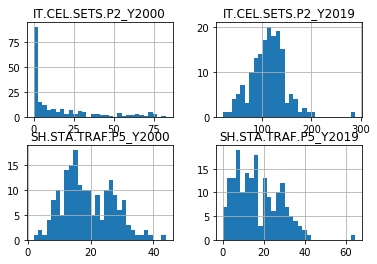

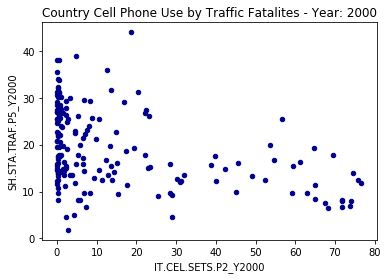

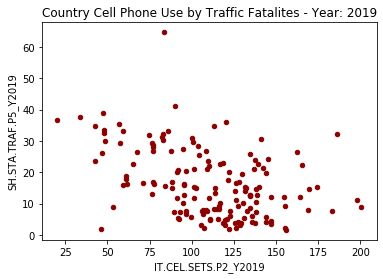

In [20]:
%matplotlib inline
from IPython.display import display, Markdown #<--this import permits displaying markdown as part of the output


#Create some descriptive exploratory univariate and bi-variate plots

#Display some markdown in the output sell
display(Markdown("## Exploratory Plots for Country Cell Phone Use and Traffic Fatalities - 2000 and 2019"))

#Create histograms for each indactor code value column
hist = CountryOnly_pivot_DF.hist(bins=30)

#Create basic scatter plot for each indicator code year column pairs 
ax1 = CountryOnly_pivot_DF.plot.scatter(x='IT.CEL.SETS.P2_Y2000',
                      y='SH.STA.TRAF.P5_Y2000',
                      c='DarkBlue',
                      title='Country Cell Phone Use by Traffic Fatalites - Year: 2000')

ax2 = CountryOnly_pivot_DF.plot.scatter(x='IT.CEL.SETS.P2_Y2019',
                      y='SH.STA.TRAF.P5_Y2019',
                      c='DarkRed',
                      title='Country Cell Phone Use by Traffic Fatalites - Year: 2019')  
                                     


# Summary and Conclusion:


We have walk through many of the DSA-PLC stages in this mini-analysis practice. The problem has been briefly define, data has been acquired and attributed to its original source, much data carpentry and reshaping was executed, and expletory data analysis (EDA) was performed.

The results of the EDA show the indicator variables for individual countries to be skewed and multi-modal with some potential extreme outlier values. The scatter plots show the result of these summary descriptors as do the only modest correlations strength.

More examination of the data is needed to better prepare it for analysis.



# Save your notebook, then `File > Close and Halt`